In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check for missing values and data types
print(data.info())
print(data.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

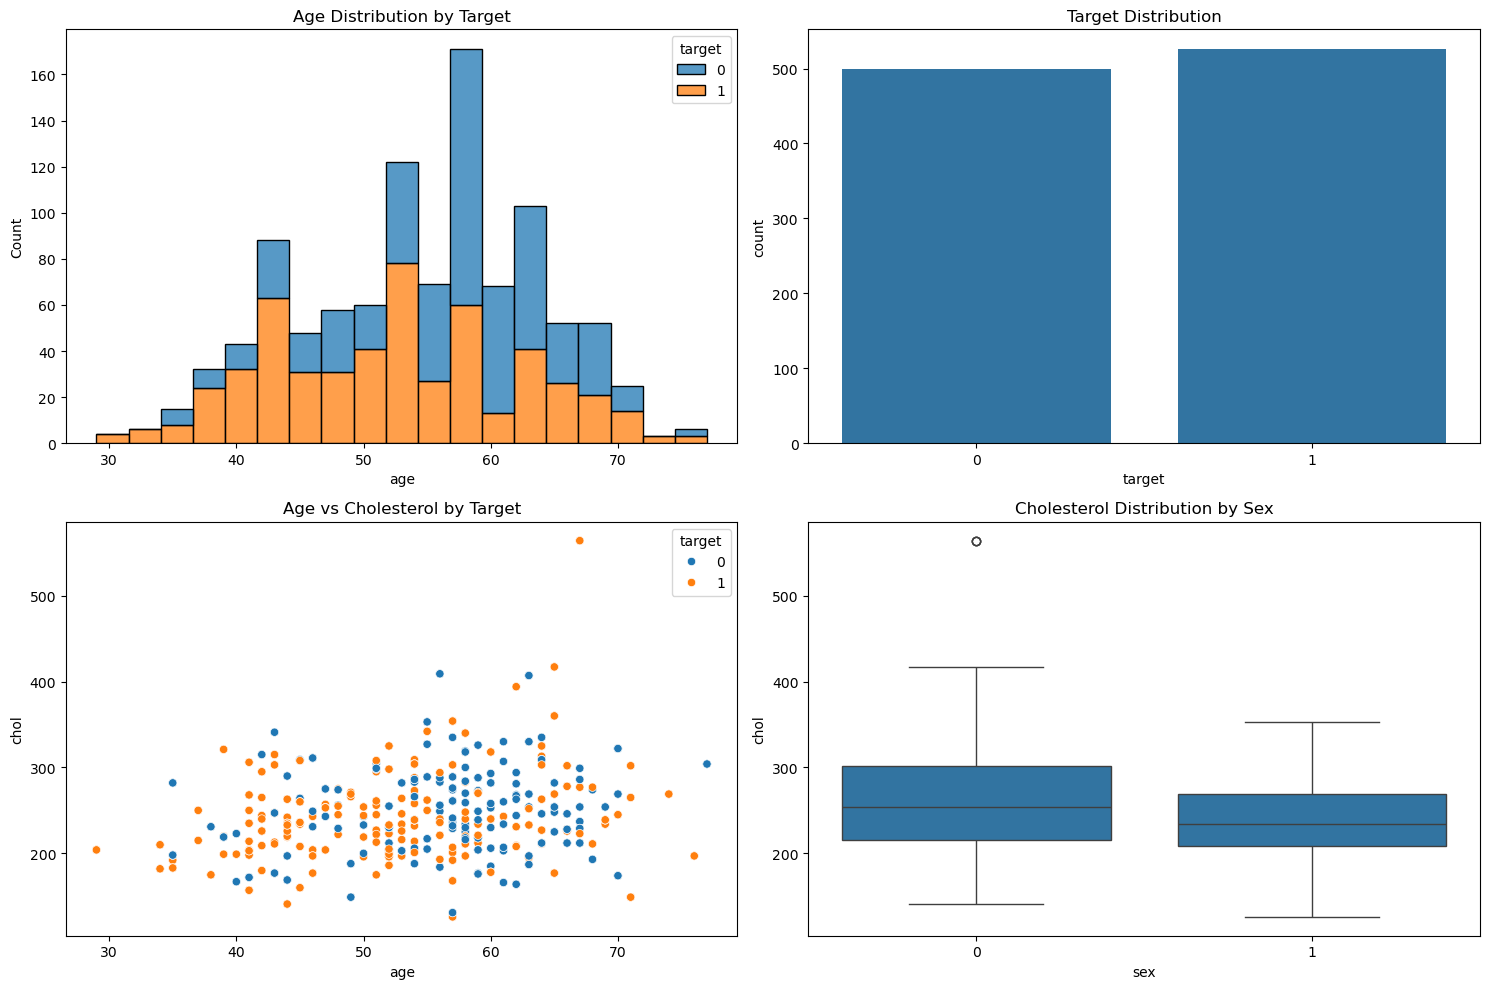

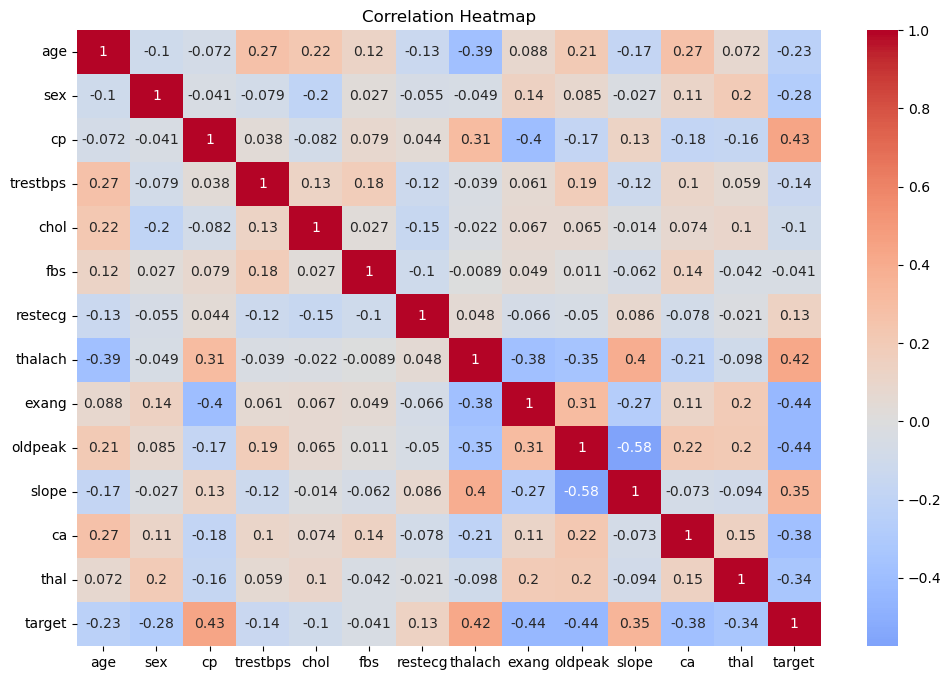

In [2]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Histogram for age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='age', hue='target', multiple="stack")
plt.title('Age Distribution by Target')

# Bar plot for target distribution
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='target')
plt.title('Target Distribution')

# Joint plot for age and cholesterol
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='age', y='chol', hue='target')
plt.title('Age vs Cholesterol by Target')

# Box plot for cholesterol by sex
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='sex', y='chol')
plt.title('Cholesterol Distribution by Sex')

plt.tight_layout()
plt.show()

# Additional visualization - correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Splitting the data into features and target
X = data_imputed.drop('target', axis=1)
y = data_imputed['target']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the Decision Tree model:", accuracy)

Accuracy of the Decision Tree model: 0.9853658536585366


Decision Tree Results:
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Results:
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Gradient Boosting Results:
Accuracy: 0.9317
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       102
         1.0       0.92      0.95      0.93 

<Figure size 1200x600 with 0 Axes>

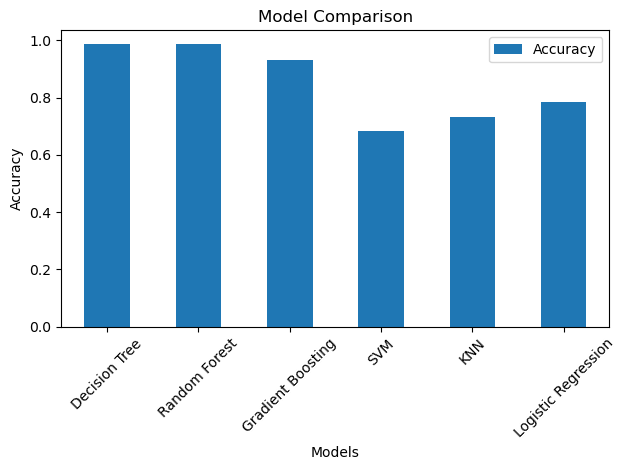

In [4]:
# Import necessary algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Dictionary to store model performances
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\
{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\
Classification Report:")
    print(classification_report(y_test, y_pred))

# Plotting the results
plt.figure(figsize=(12, 6))
models_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
models_df.plot(kind='bar')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()